## <span style="color:purple"> Final Project
<span style="color:deepskyblue"> 

> ### This notebook will contain anylysis, results, and plots that would help project changes in the hydrological cycle, answering the following question: is it true that "wet gets wetter, dry gets drier"?
<span style="color:blue"> Elements used in this notebook would include: 
> * Observational data models
> * Observed model calculations
> * Differences
> * Graphs

Contact info:

<span style="color:green">
    
* Author: Mohamed Soma
* Email: Tuh11361@temple.edu

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr  
import gcsfs 
import momlevel as ml
import cftime
import cmocean

In [3]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6

In [4]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [5]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [6]:
google_cloud_cmip6

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
523769,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523770,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523771,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
523772,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [8]:
gfdl_esm4_sos1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [9]:
gfdl_esm4_sos1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
13884,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [10]:
zstore_esm4_sos1 = gfdl_esm4_sos1_data.zstore.values[-1]
mapper_esm4_sos1 = gcs.get_mapper(zstore_esm4_sos1)
gfdl_esm4_sos1 = xr.open_zarr(mapper_esm4_sos1, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos1

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

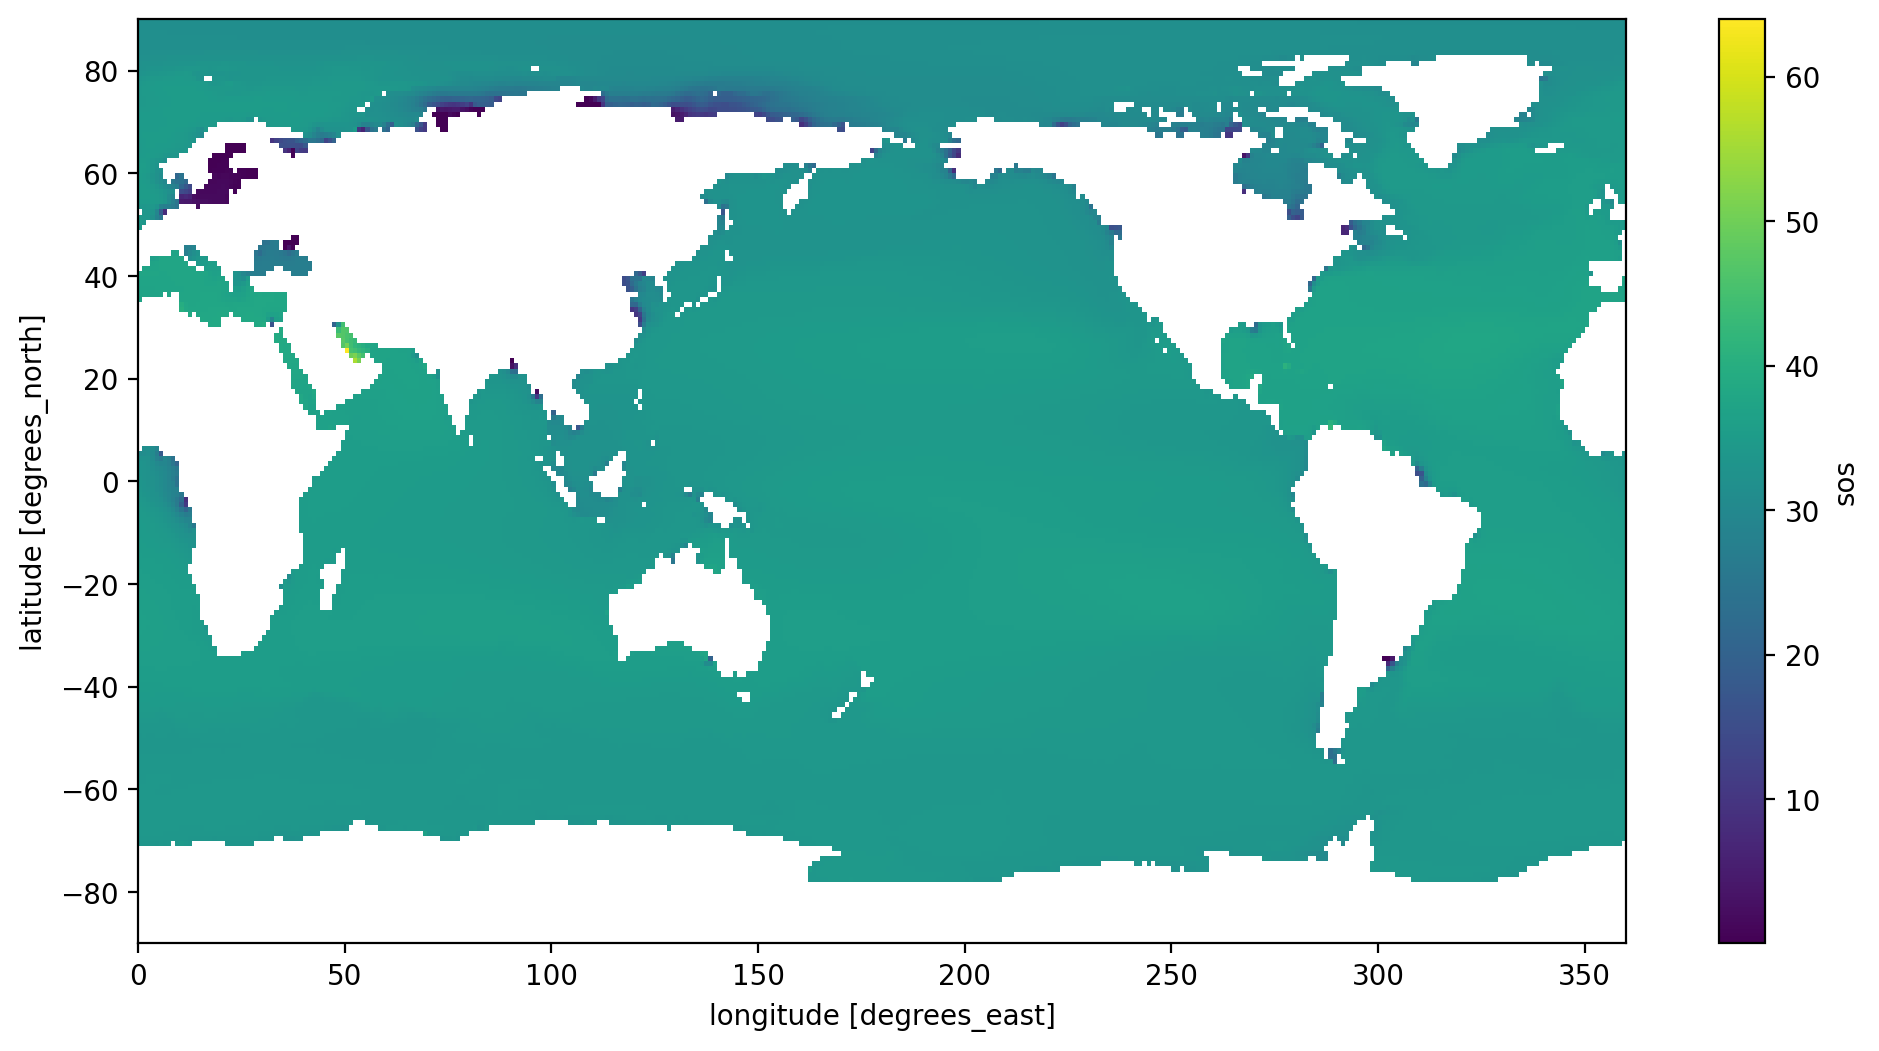

In [11]:
gfdl_esm4_sos1.mean(dim='time').plot()

In [12]:
gfdl_esm4_sos2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_sos2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15226,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [13]:
zstore_esm4_sos2 = gfdl_esm4_sos2_data.zstore.values[-1]
mapper_esm4_sos2 = gcs.get_mapper(zstore_esm4_sos2)
gfdl_esm4_sos2 = xr.open_zarr(mapper_esm4_sos2, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos2

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

In [14]:
gfdl_esm4_sos5_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'sos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_sos5_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
12051,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Omon,sos,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [15]:
zstore_esm4_sos5 = gfdl_esm4_sos5_data.zstore.values[-1]
mapper_esm4_sos5 = gcs.get_mapper(zstore_esm4_sos5)
gfdl_esm4_sos5 = xr.open_zarr(mapper_esm4_sos5, 
                                consolidated=True,use_cftime=True).sos.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_sos5

<xarray.DataArray 'sos' (time: 1032, latitude: 180, longitude: 360)>
dask.array<open_dataset-sos, shape=(1032, 180, 360), dtype=float32, chunksize=(439, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Sea Surface Salinity
    original_name:  sos
    standard_name:  sea_surface_salinity
    units:          0.001

In [16]:
gfdl_esm4_pr1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_pr1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15844,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [17]:
zstore_esm4_pr1 = gfdl_esm4_pr1_data.zstore.values[-1]
mapper_esm4_pr1 = gcs.get_mapper(zstore_esm4_pr1)
gfdl_esm4_pr1 = xr.open_zarr(mapper_esm4_pr1, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr1

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

Text(0.5, 1.0, 'Precipitation')

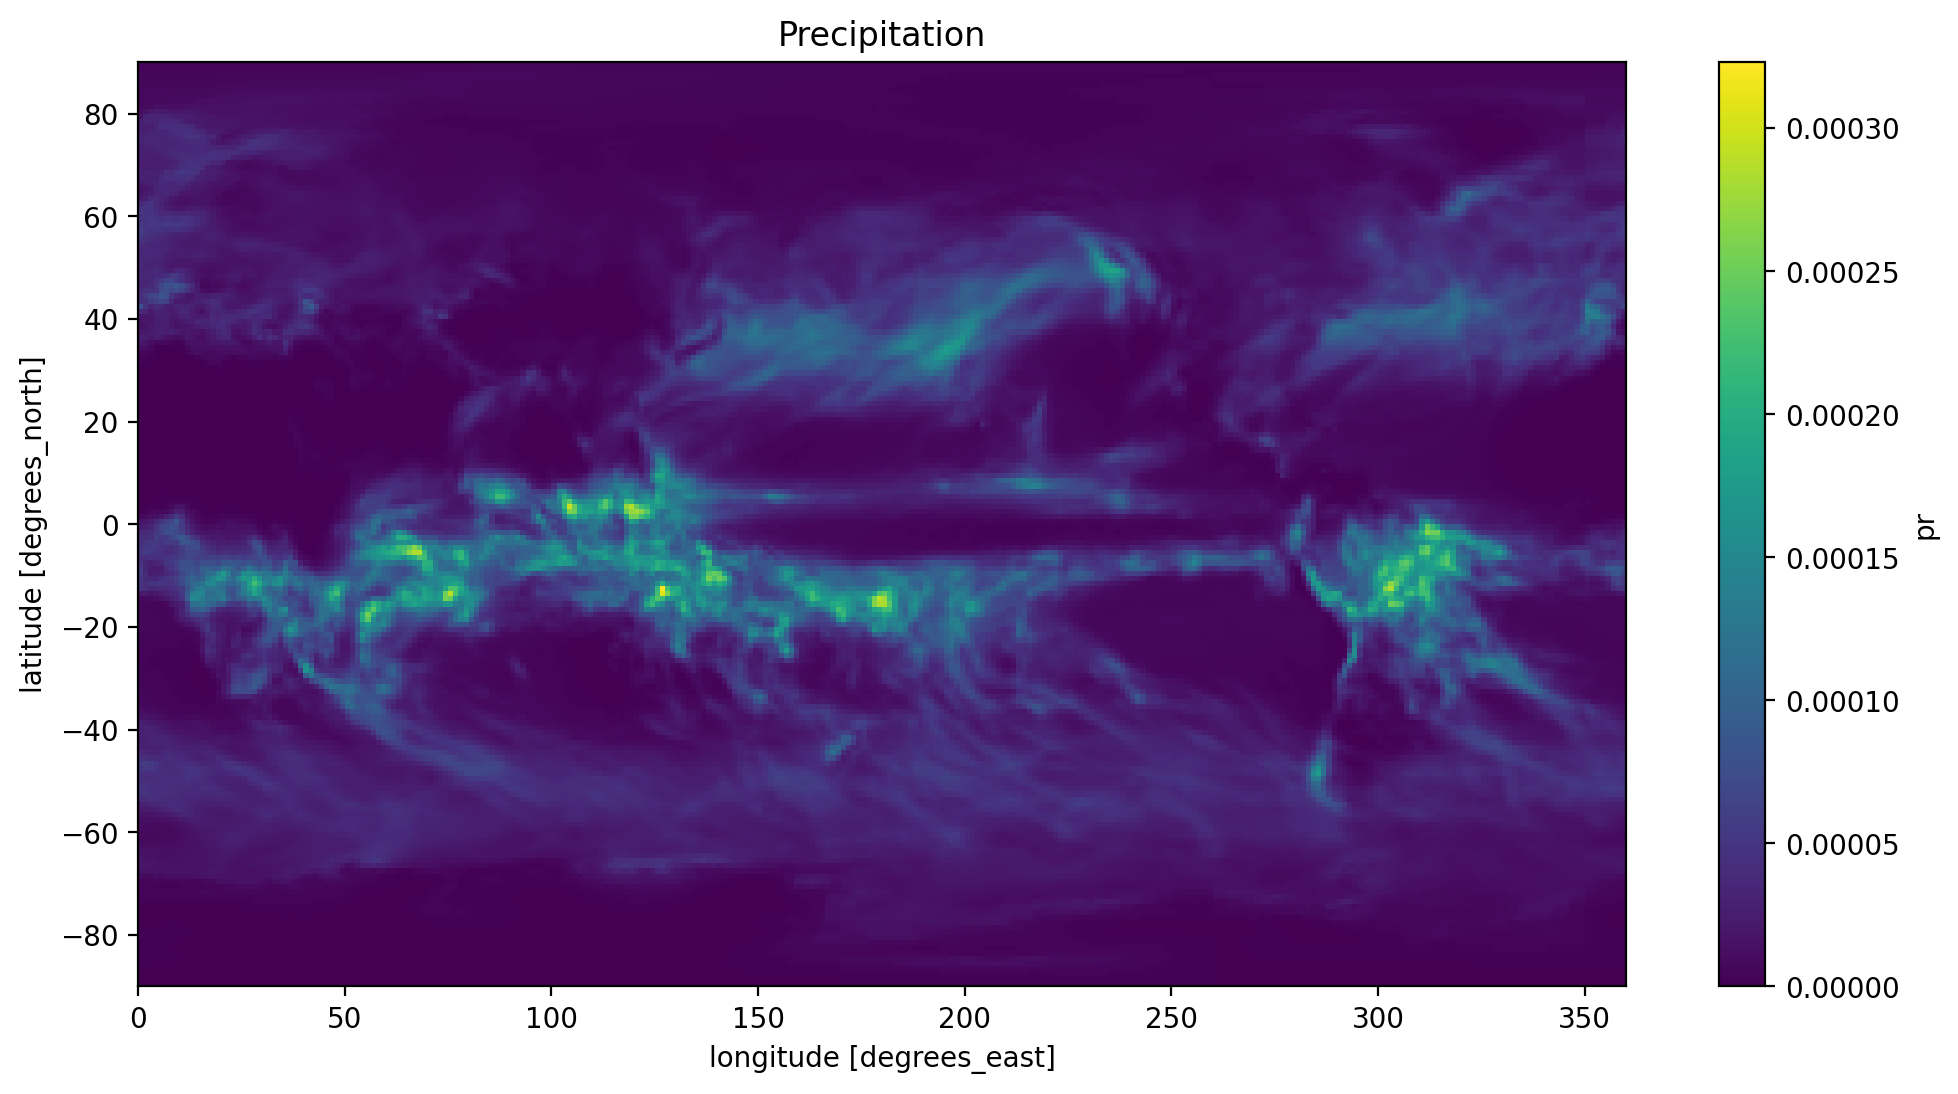

In [84]:
gfdl_esm4_pr1.sel(time=slice('2015-01-16')).mean(dim='time').plot()
plt.title('Precipitation')

Text(0.5, 1.0, 'Average precipitation')

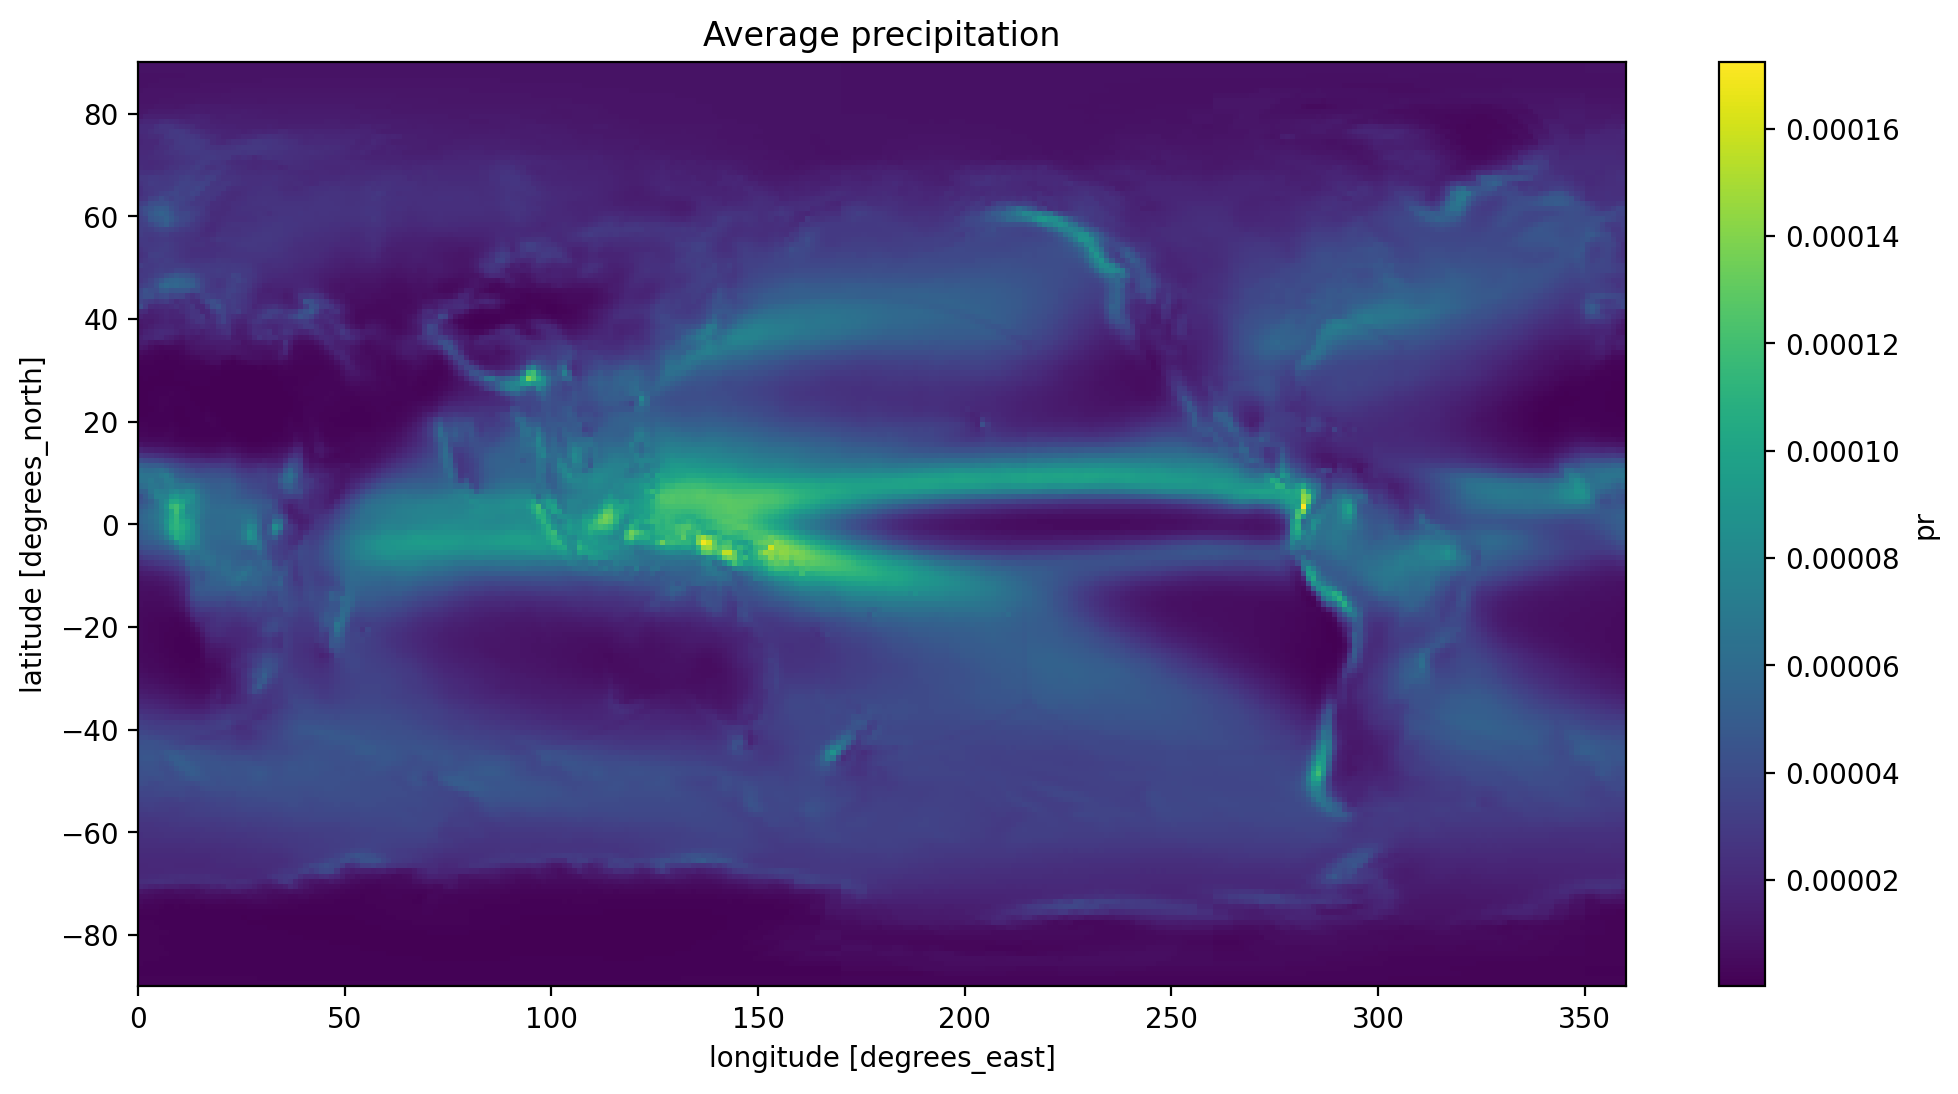

In [87]:
gfdl_esm4_pr2.mean(dim='time').plot()
plt.title('Average precipitation')

Text(0.5, 1.0, 'Preciptation "2100"')

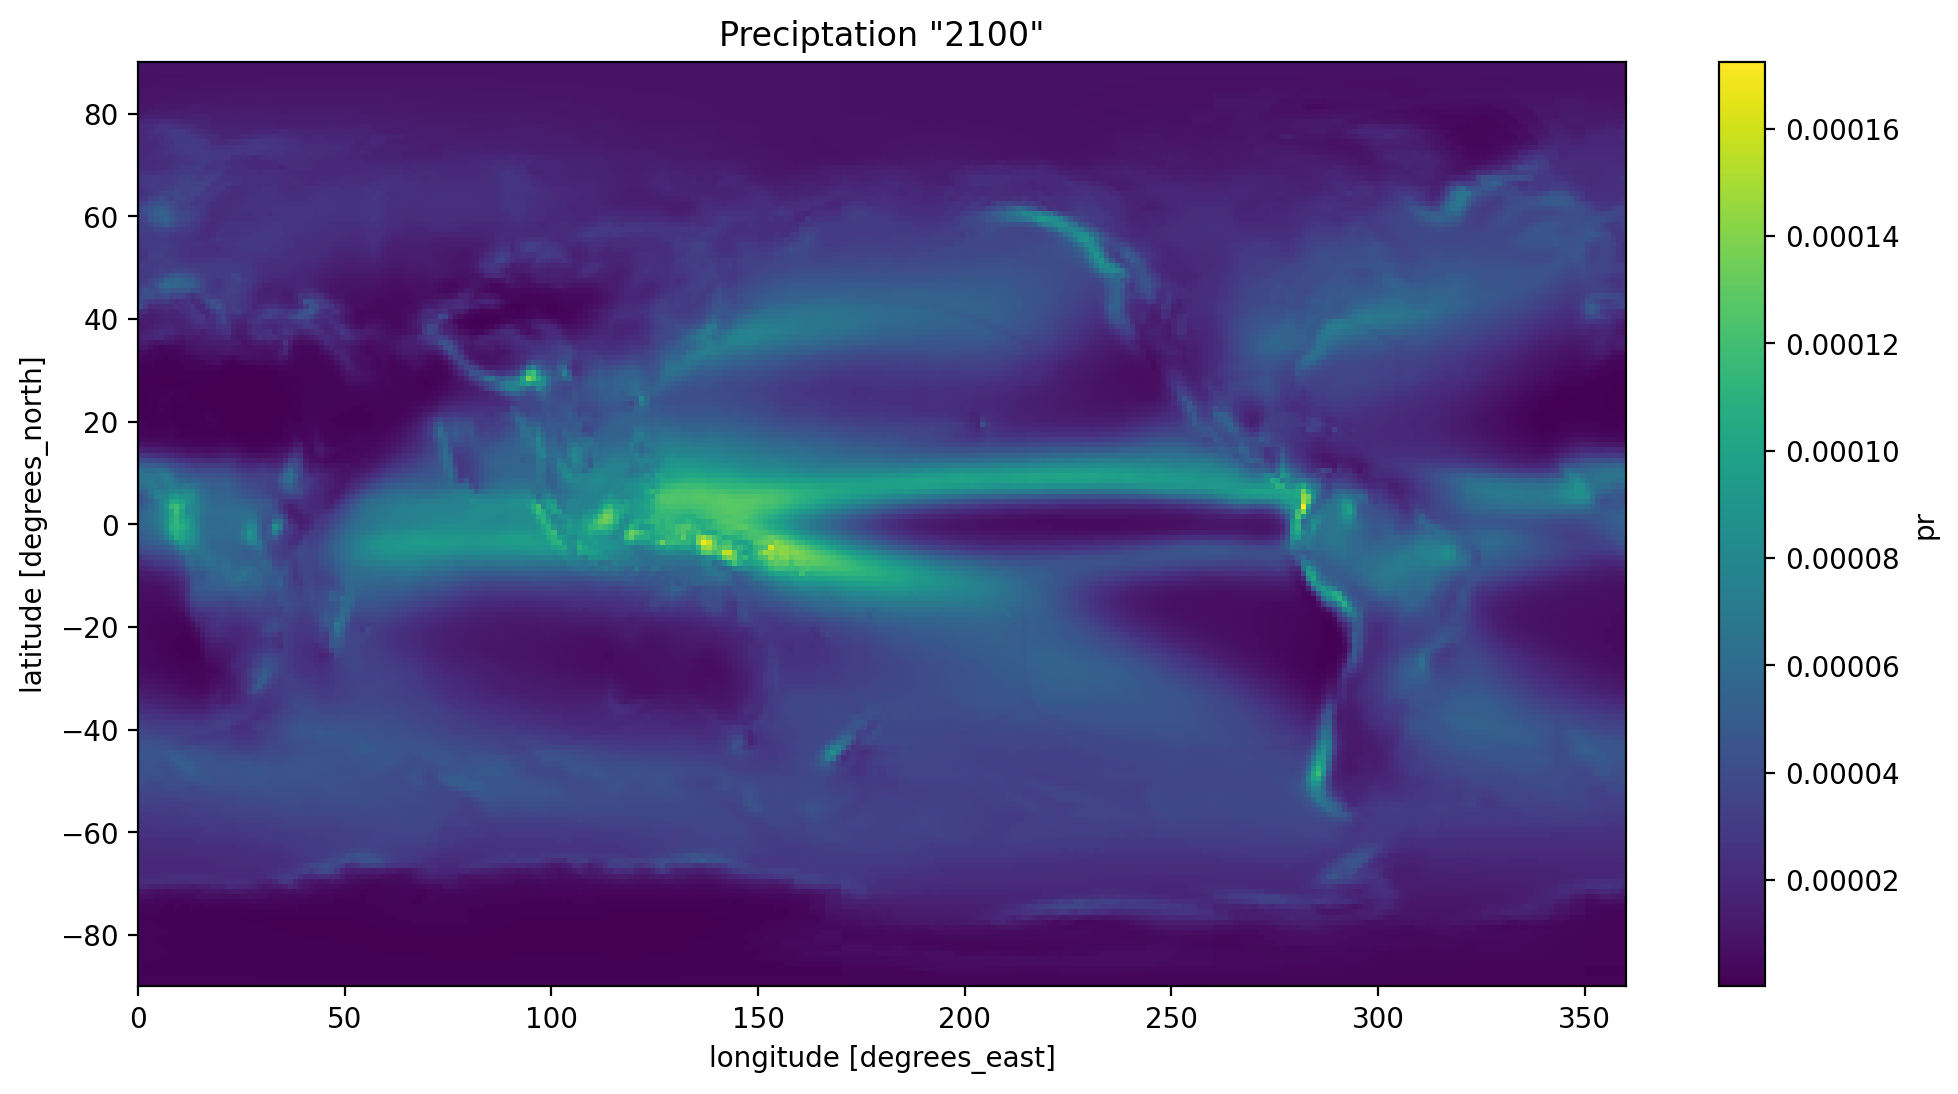

In [88]:
gfdl_esm4_pr2.sel(time=slice('2100-12-16')).mean(dim='time').plot()
plt.title('Preciptation "2100"')

Text(0.5, 1.0, 'Precipitation "2015-2025"')

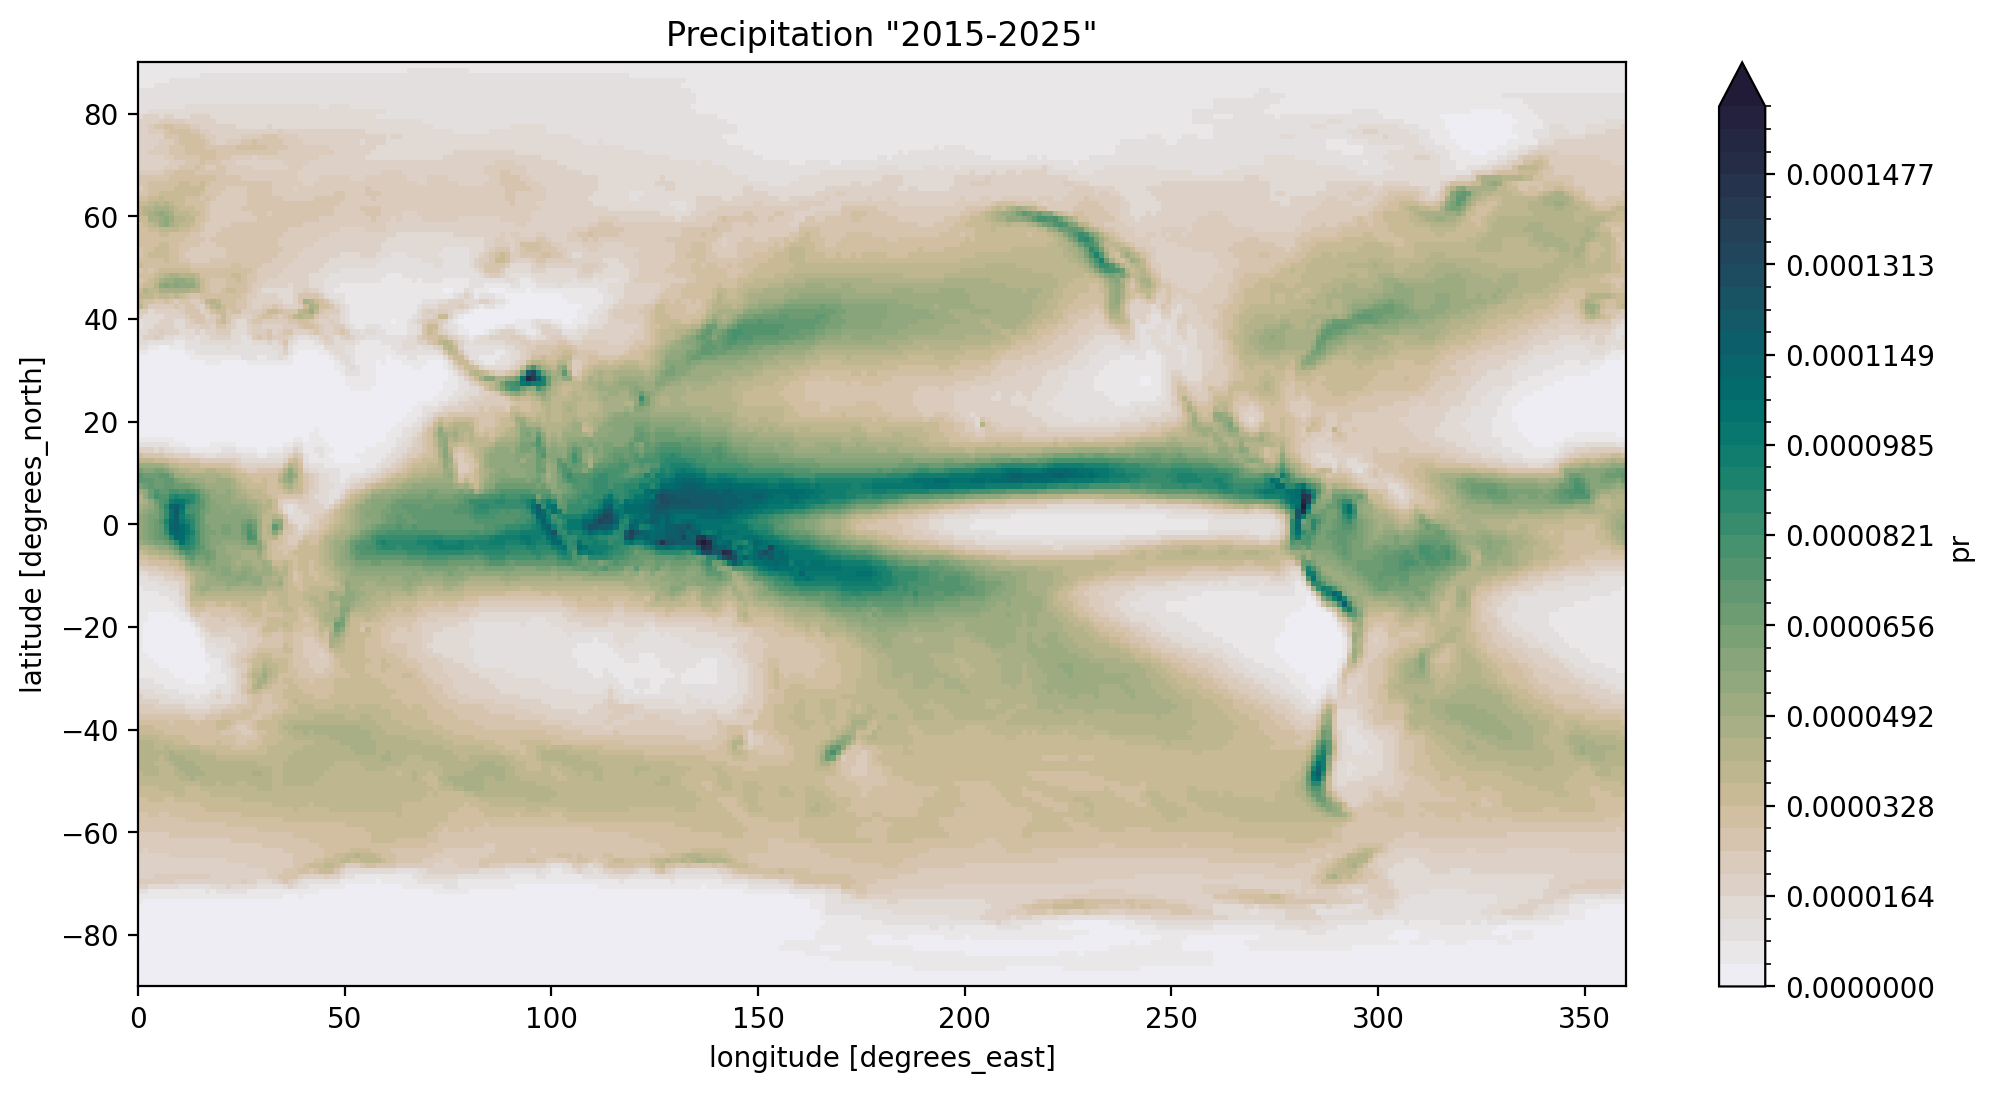

In [68]:
gfdl_esm4_pr1.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time').plot(vmin=0,                  
                       vmax=0.00016,cmap=cmocean.cm.rain,
                       levels=40)

plt.title('Precipitation "2015-2025"')

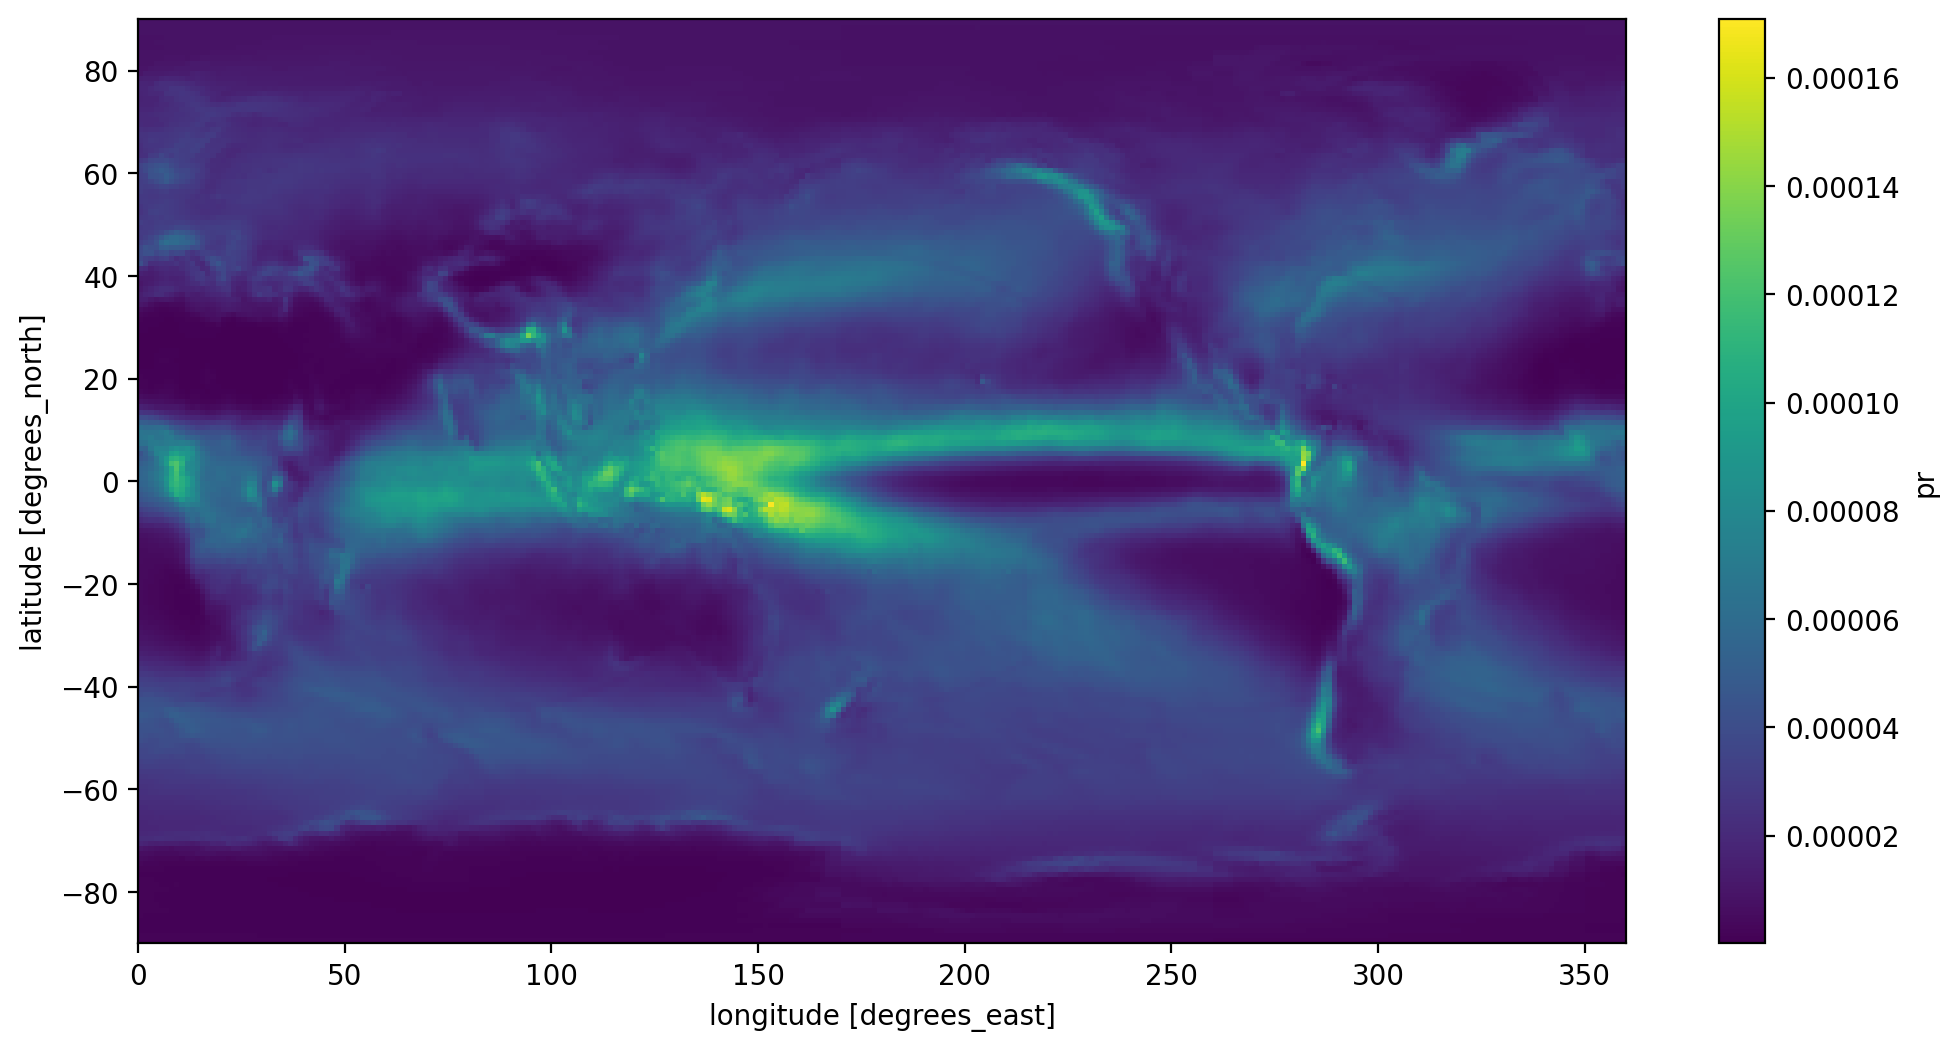

In [70]:
gfdl_esm4_pr1.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot()

Text(0.5, 1.0, 'Preciptation "2091-2100"')

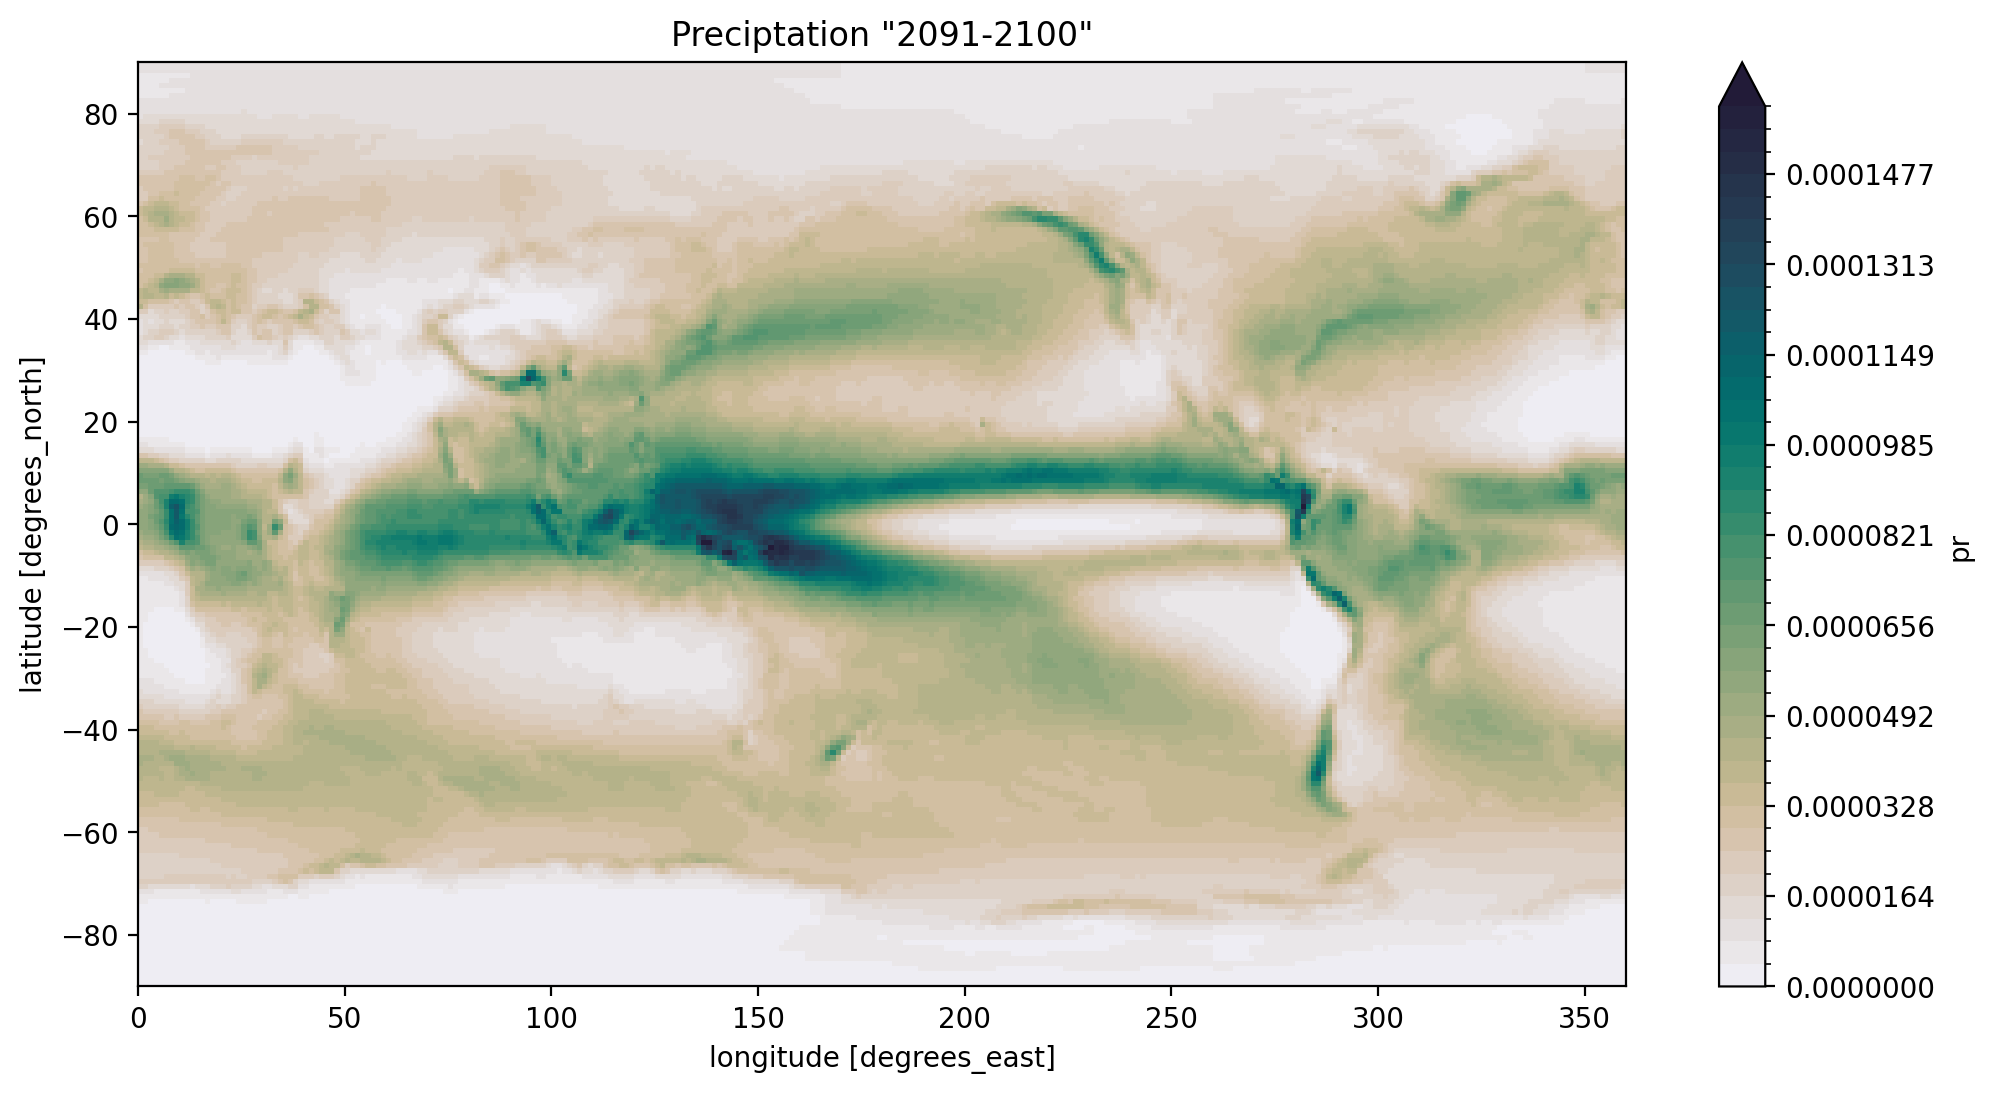

In [69]:
gfdl_esm4_pr1.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot(vmin=0,
                                                                               vmax=0.00016,cmap=cmocean.cm.rain,
                                                                               levels=40)
plt.title('Preciptation "2091-2100"')

In [19]:
gfdl_esm4_pr2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_pr2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15390,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [20]:
zstore_esm4_pr2 = gfdl_esm4_pr2_data.zstore.values[-1]
mapper_esm4_pr2 = gcs.get_mapper(zstore_esm4_pr2)
gfdl_esm4_pr2 = xr.open_zarr(mapper_esm4_pr2, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr2

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(618, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

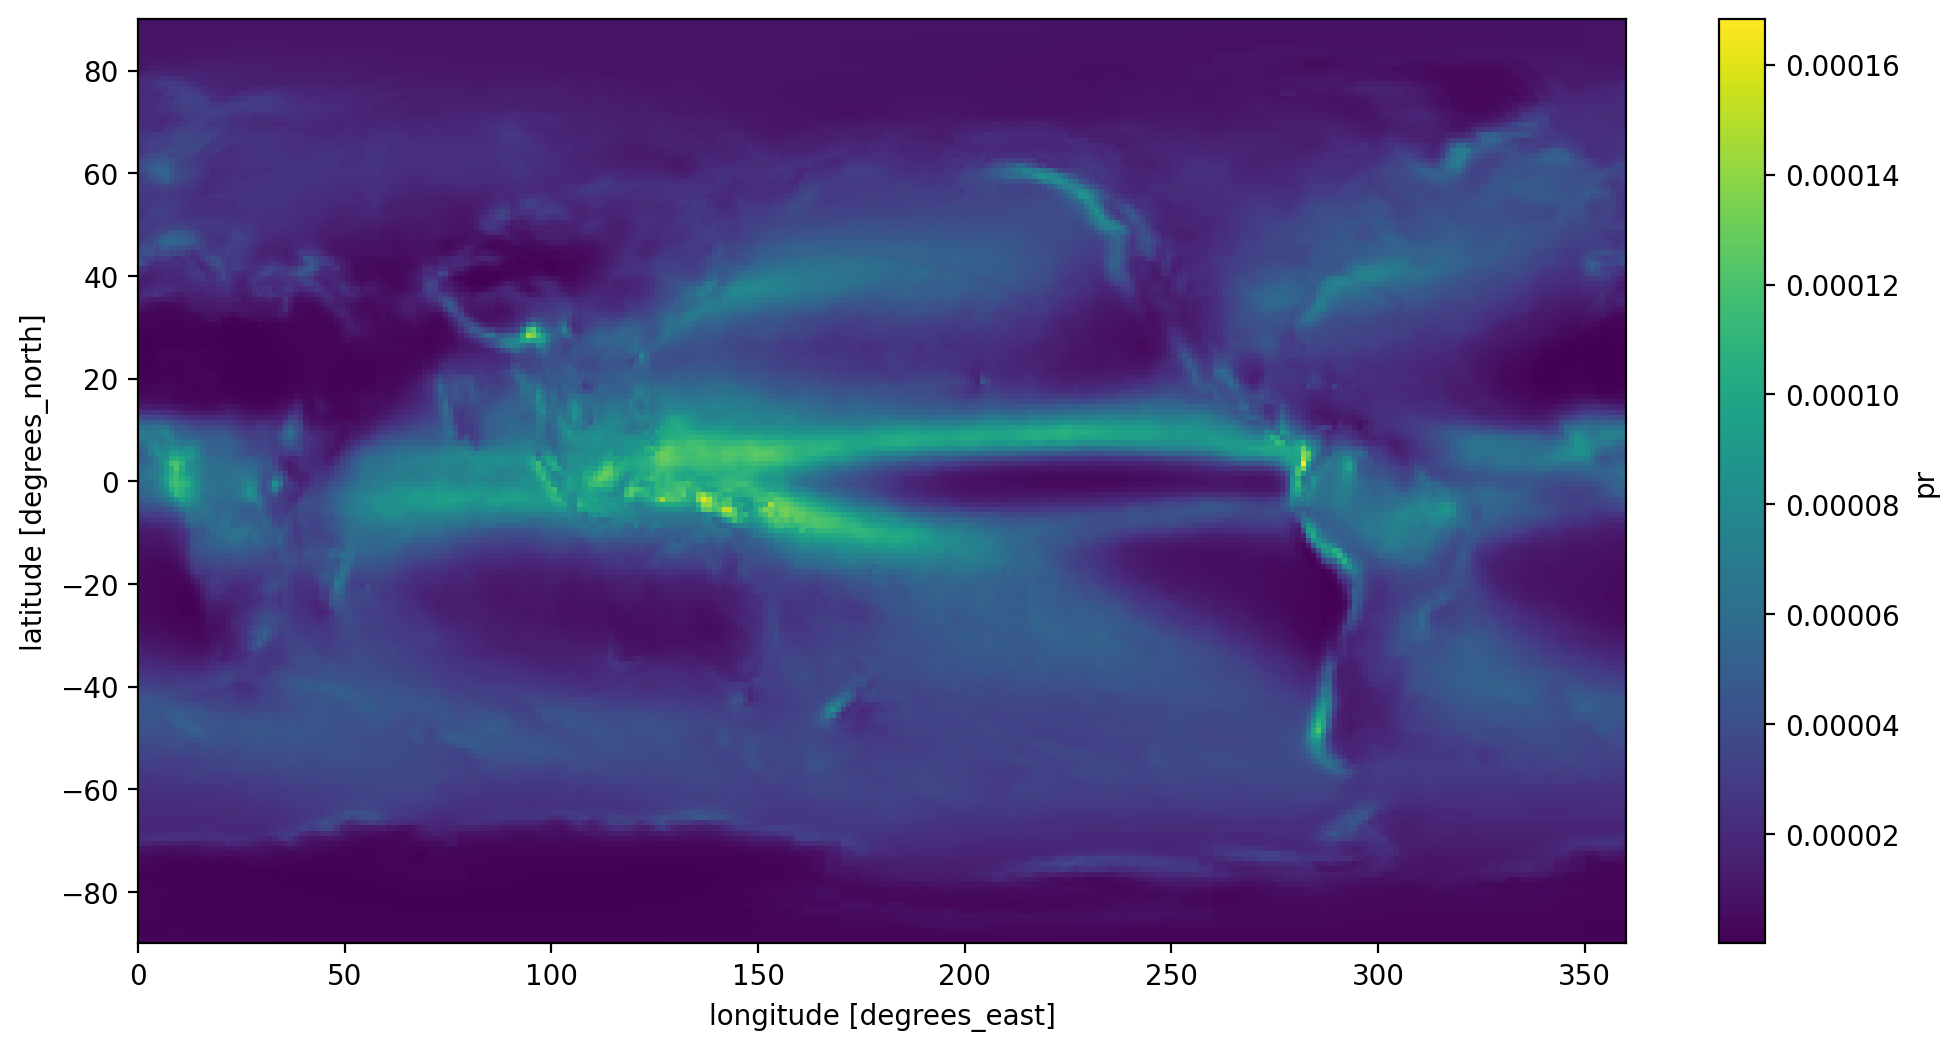

In [71]:
gfdl_esm4_pr2.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time').plot()

Text(0.5, 1.0, 'Preciptation "2015-2025"')

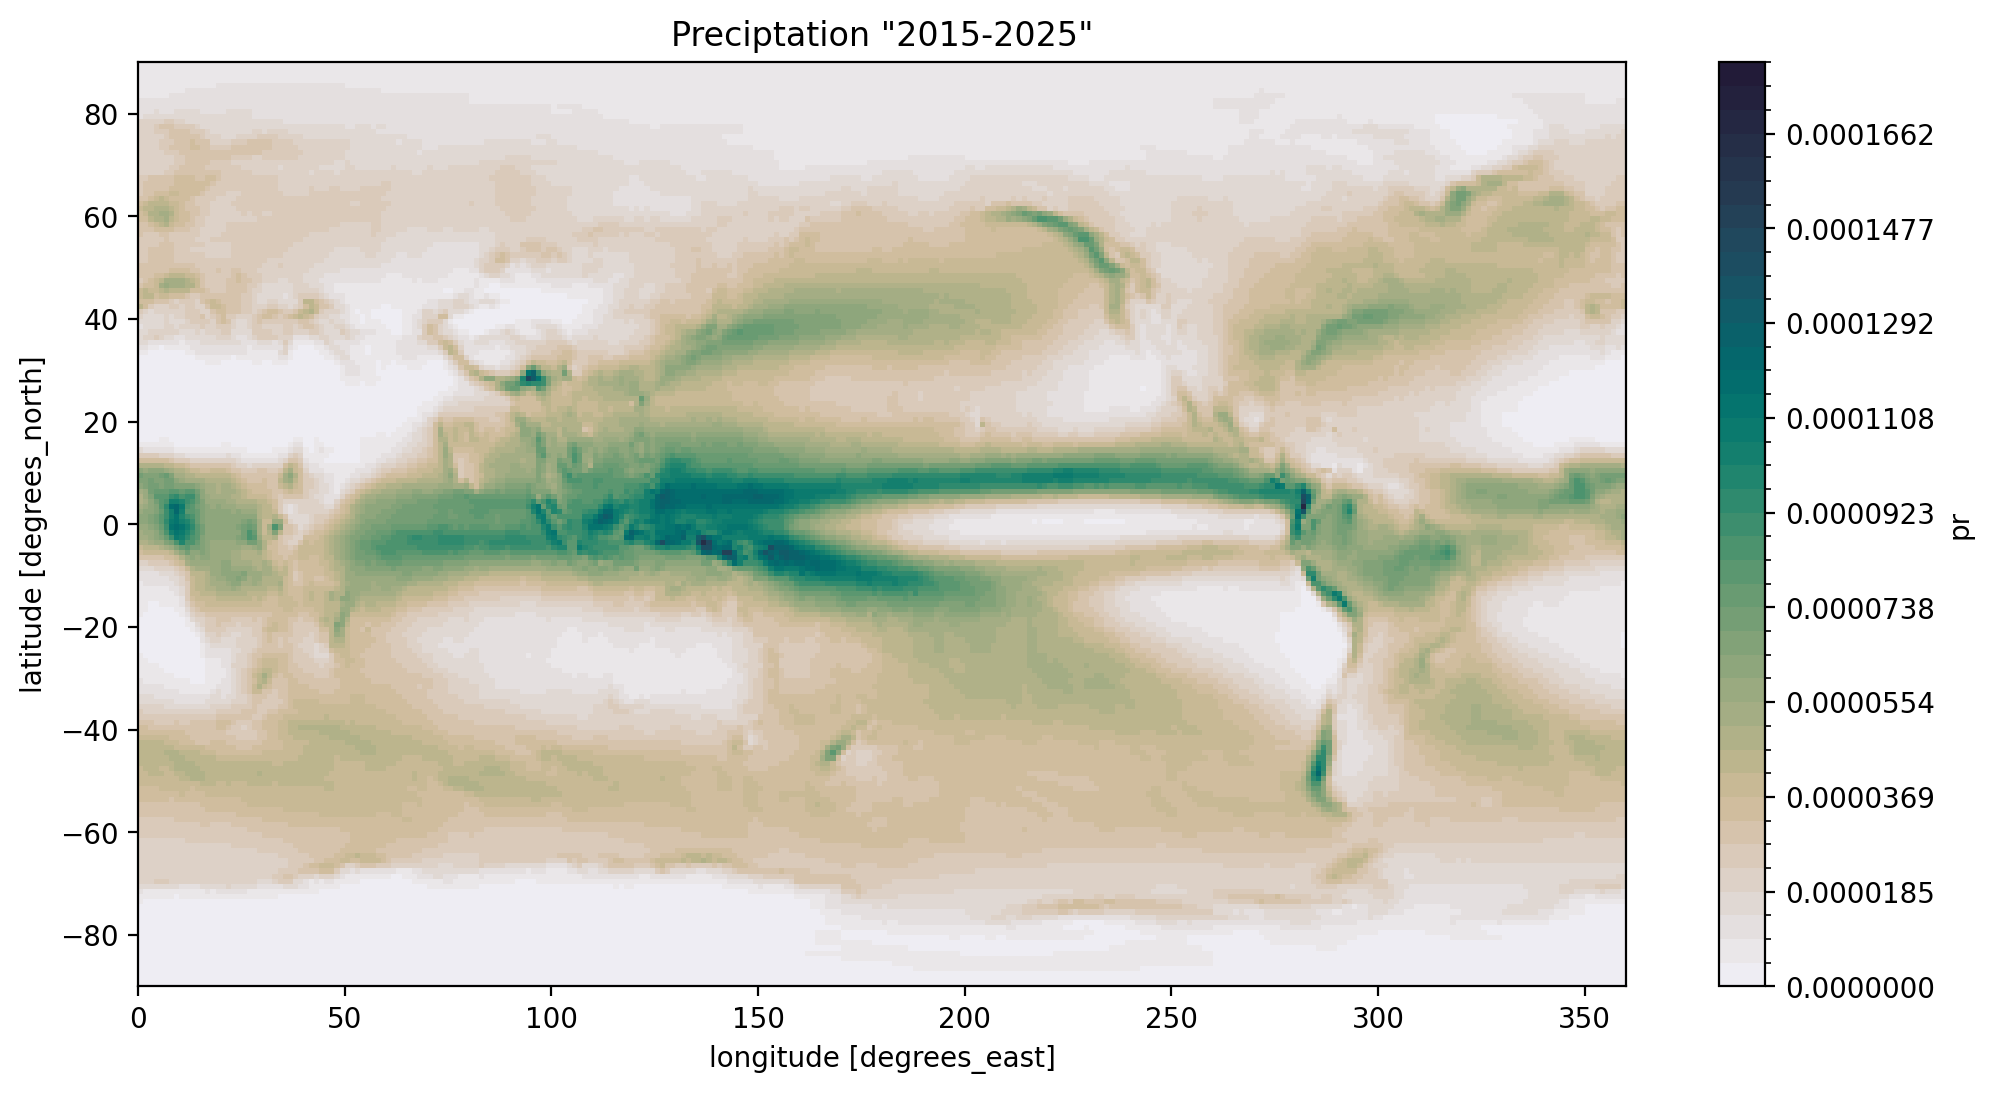

In [79]:
gfdl_esm4_pr2.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time').plot(vmin=0,
                                                                               vmax=0.00018,cmap=cmocean.cm.rain,
                                                                               levels=40)
plt.title('Preciptation "2015-2025"')

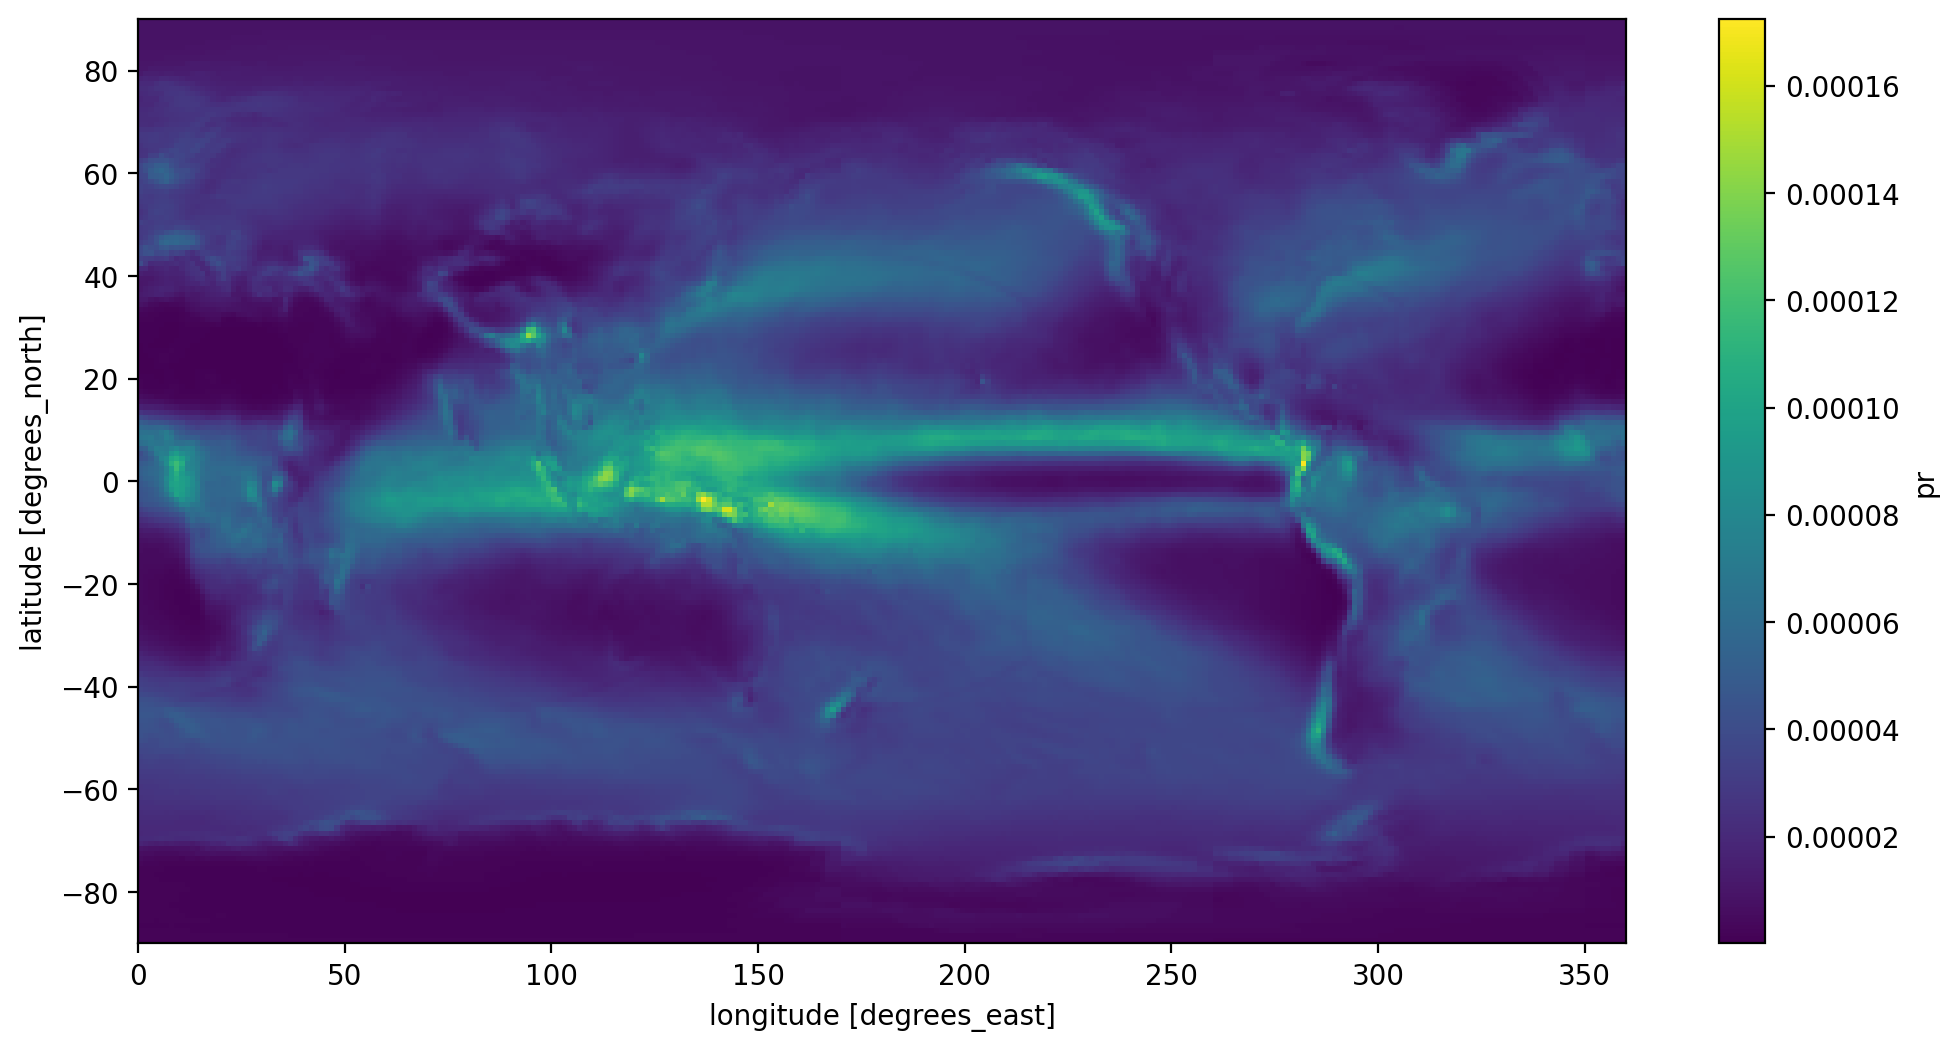

In [72]:
gfdl_esm4_pr2.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot()

Text(0.5, 1.0, 'Preciptation "2091-2100"')

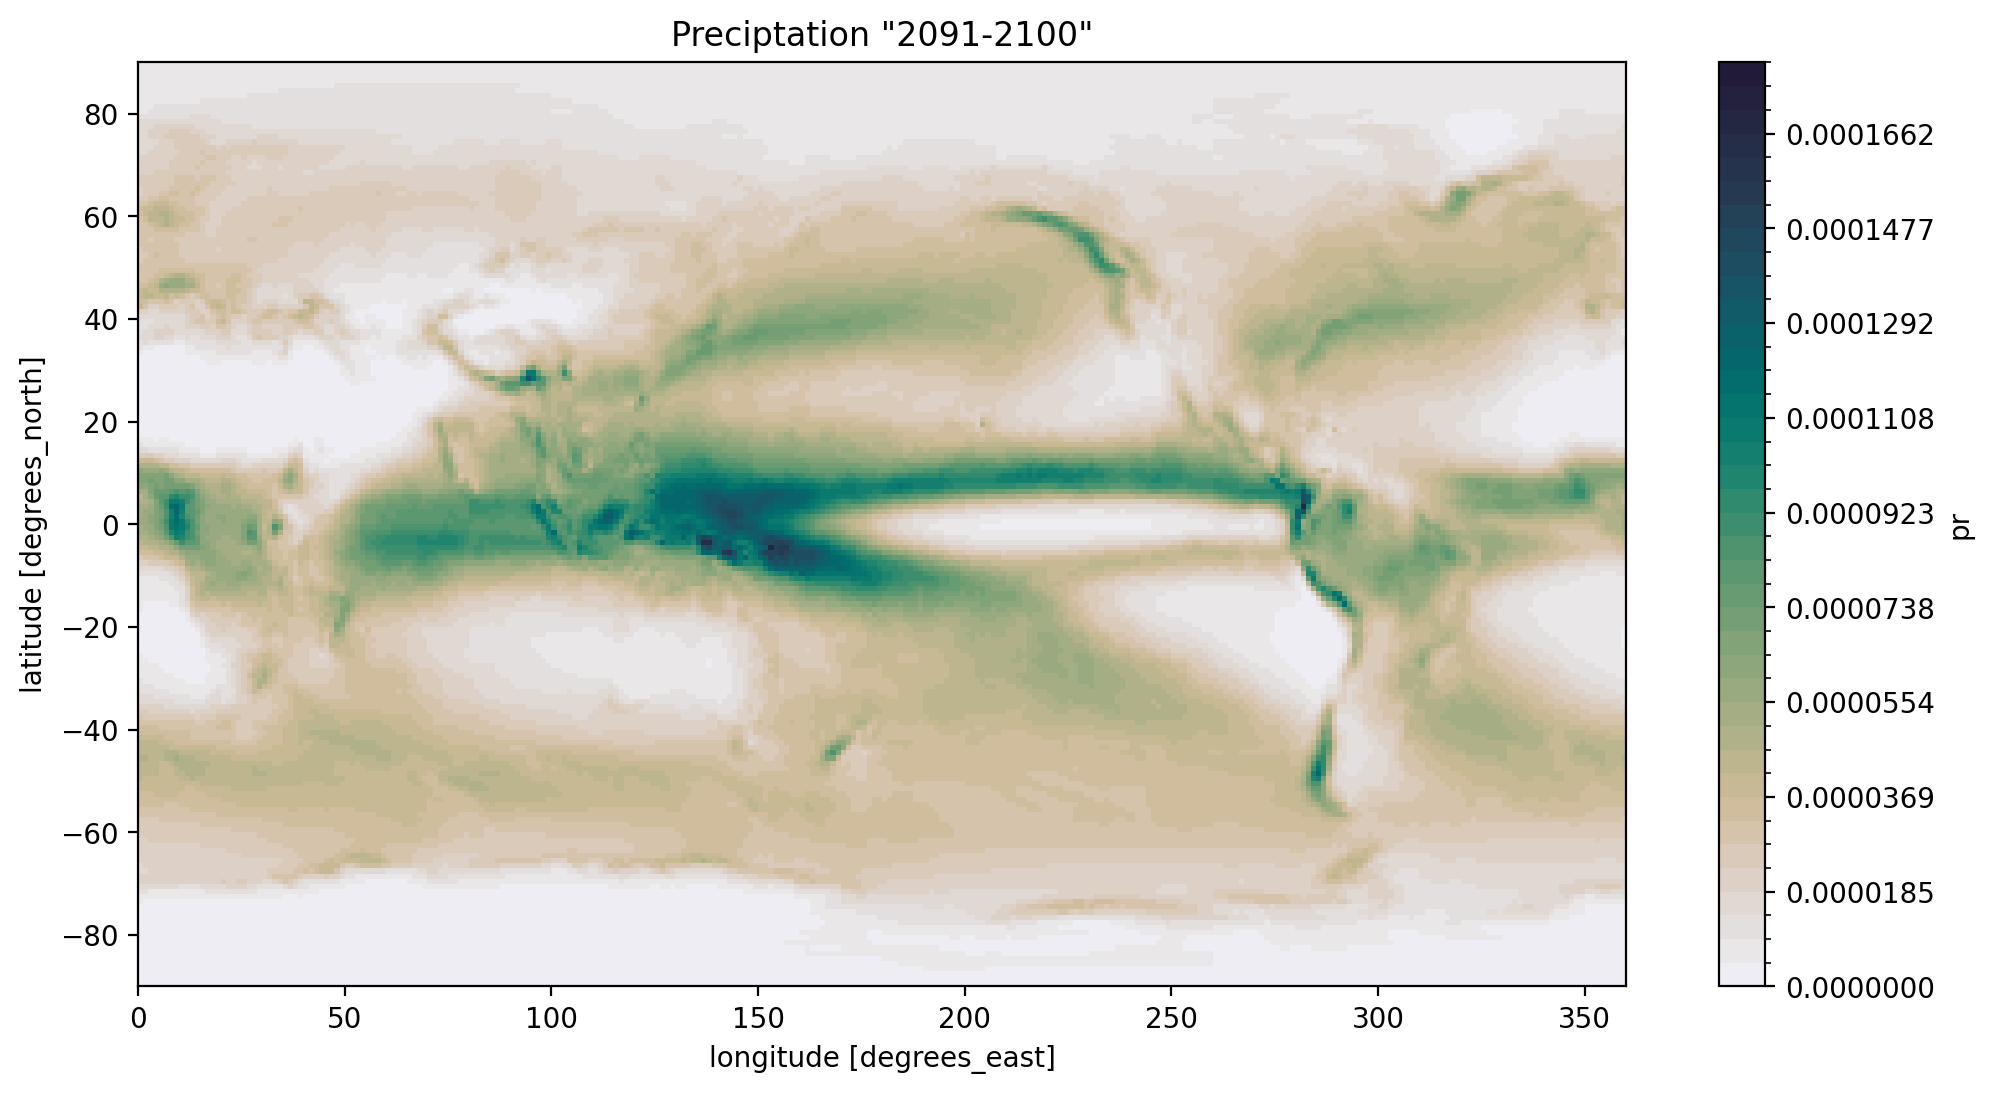

In [80]:
gfdl_esm4_pr1.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot(vmin=0,
                                                                               vmax=0.00018,cmap=cmocean.cm.rain,
                                                                               levels=40)
plt.title('Preciptation "2091-2100"')

In [21]:
gfdl_esm4_pr5_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'pr' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_pr5_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18988,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [22]:
zstore_esm4_pr5 = gfdl_esm4_pr5_data.zstore.values[-1]
mapper_esm4_pr5 = gcs.get_mapper(zstore_esm4_pr5)
gfdl_esm4_pr5 = xr.open_zarr(mapper_esm4_pr5, 
                                consolidated=True,use_cftime=True).pr.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_pr5

<xarray.DataArray 'pr' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-pr, shape=(1032, 180, 288), dtype=float32, chunksize=(600, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Precipitation
    original_name:  pr
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

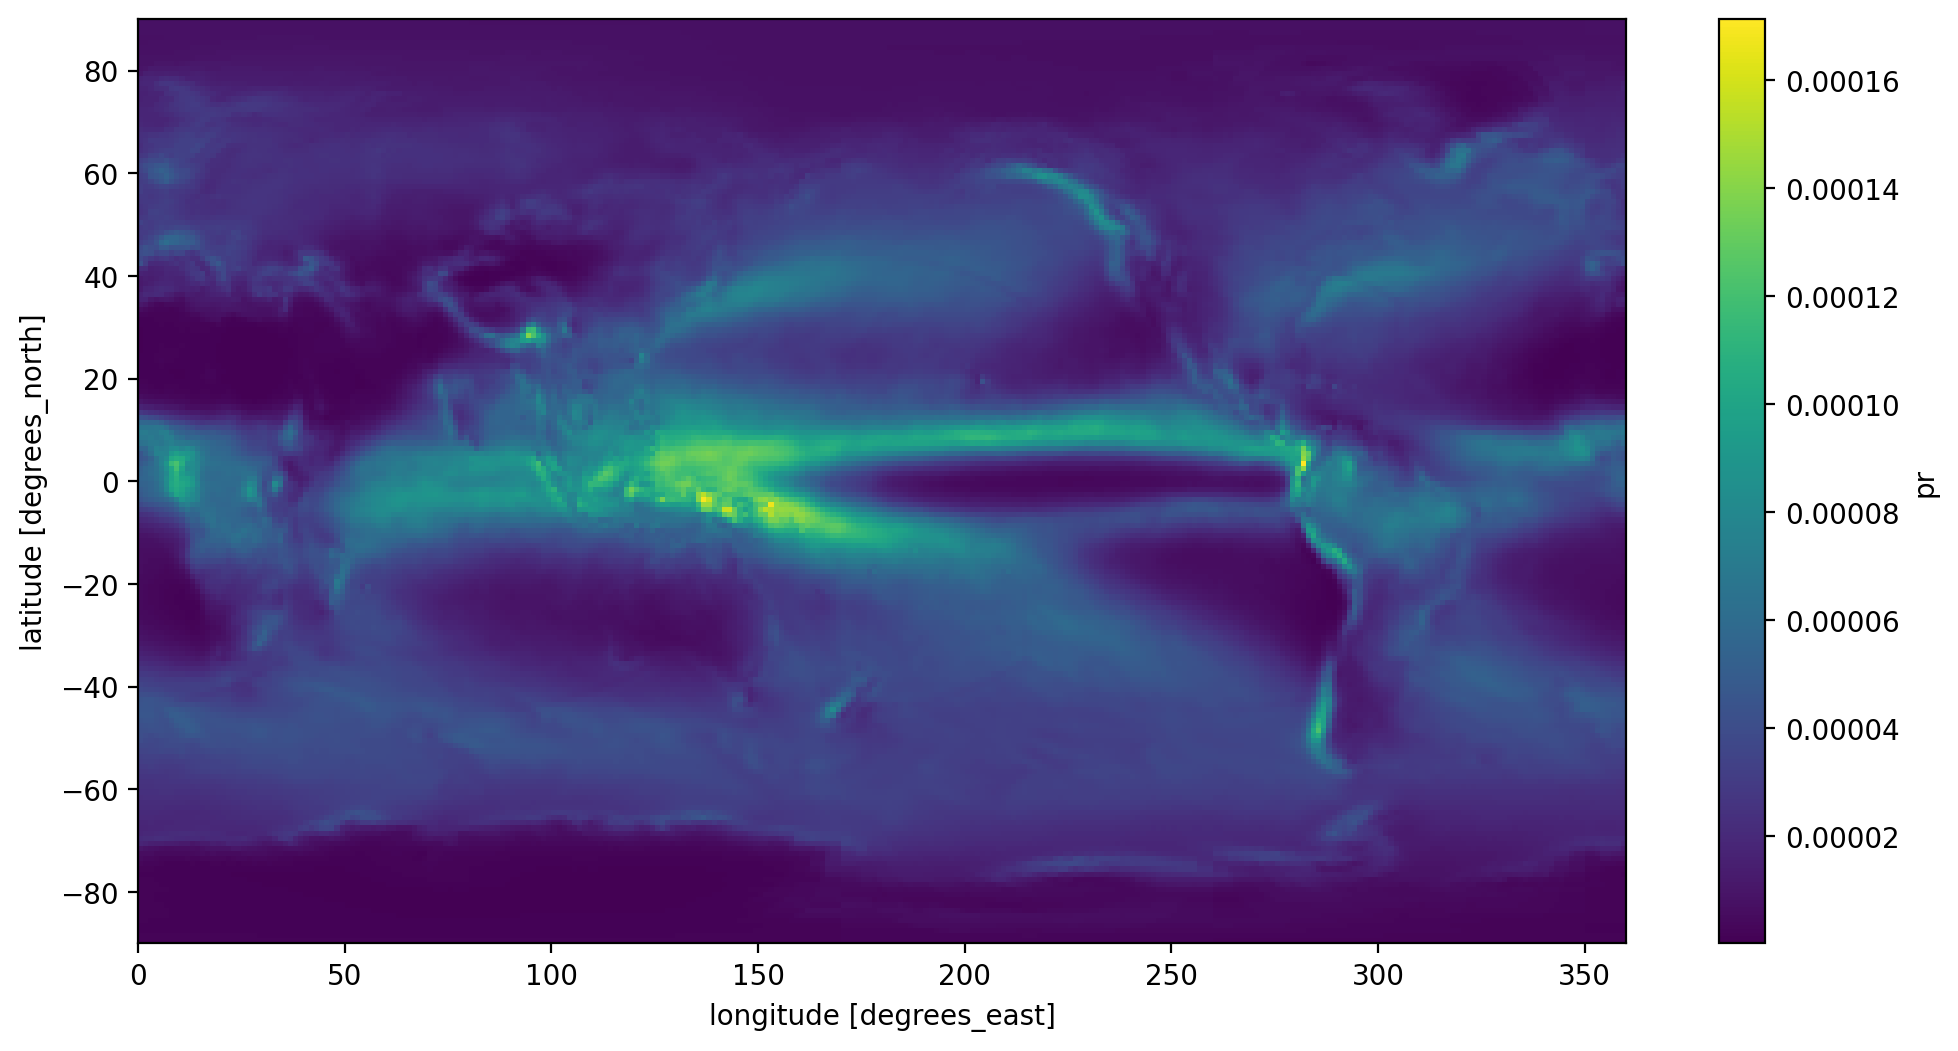

In [75]:
gfdl_esm4_pr5.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time').plot()

Text(0.5, 1.0, 'Preciptation "2015-2025"')

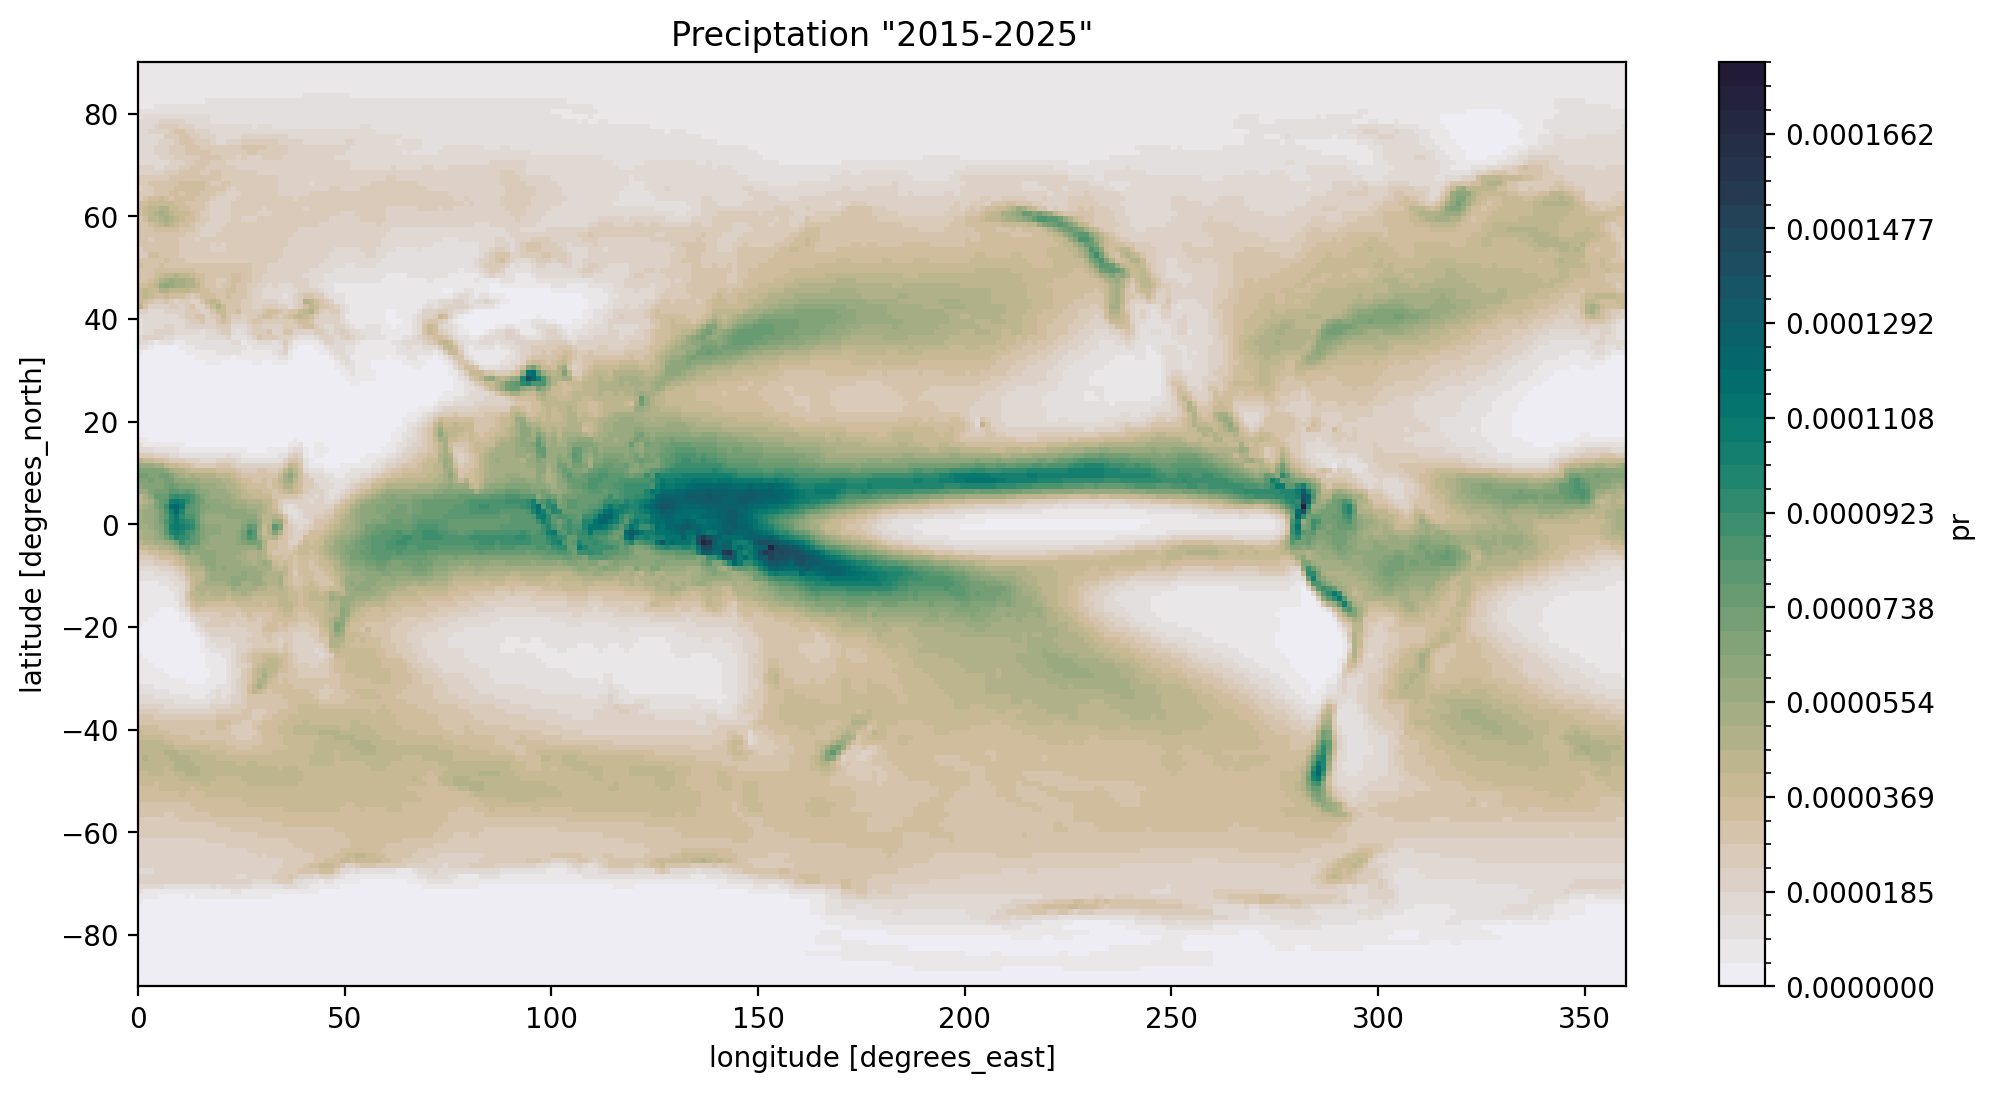

In [81]:
gfdl_esm4_pr5.sel(time=slice('2015-01-16','2025-12-16')).mean(dim='time').plot(vmin=0,
                                                                               vmax=0.00018,cmap=cmocean.cm.rain,
                                                                               levels=40)
plt.title('Preciptation "2015-2025"')

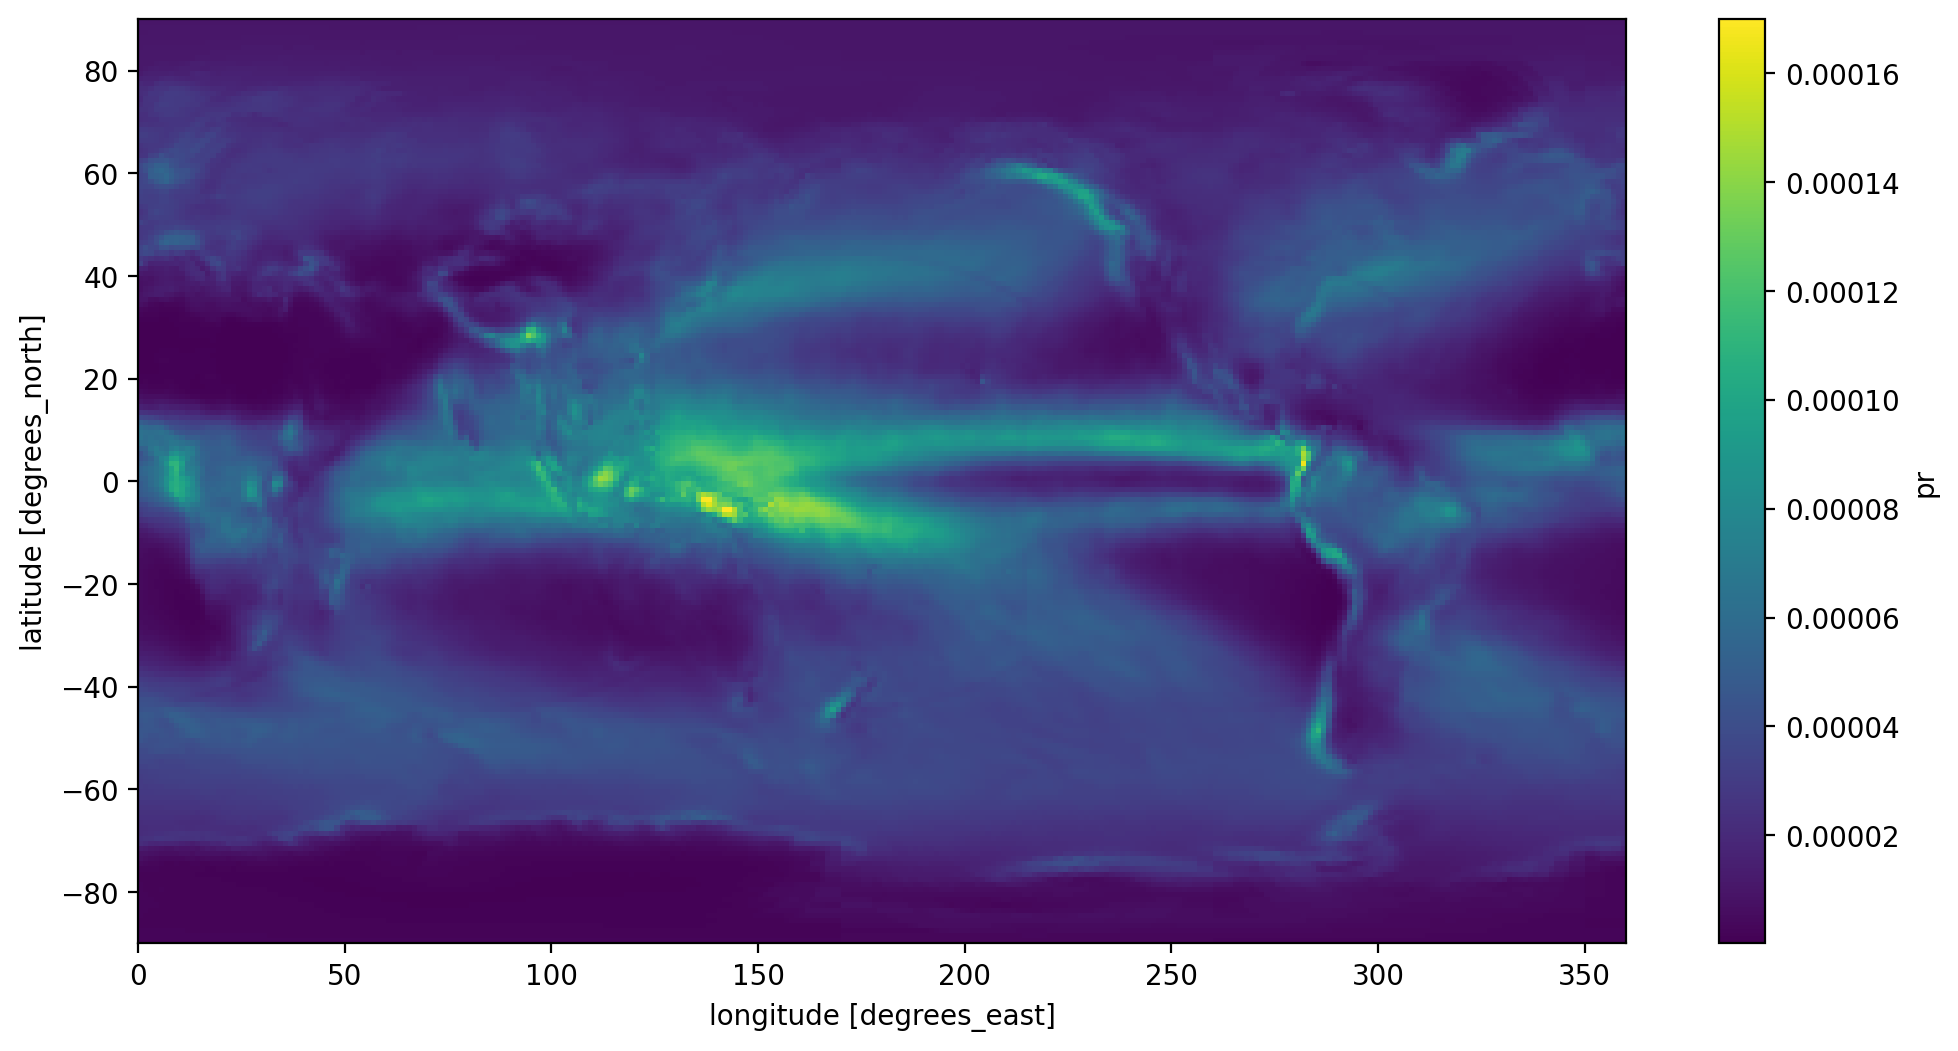

In [76]:
gfdl_esm4_pr5.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot()

Text(0.5, 1.0, 'Preciptation "2091-2100"')

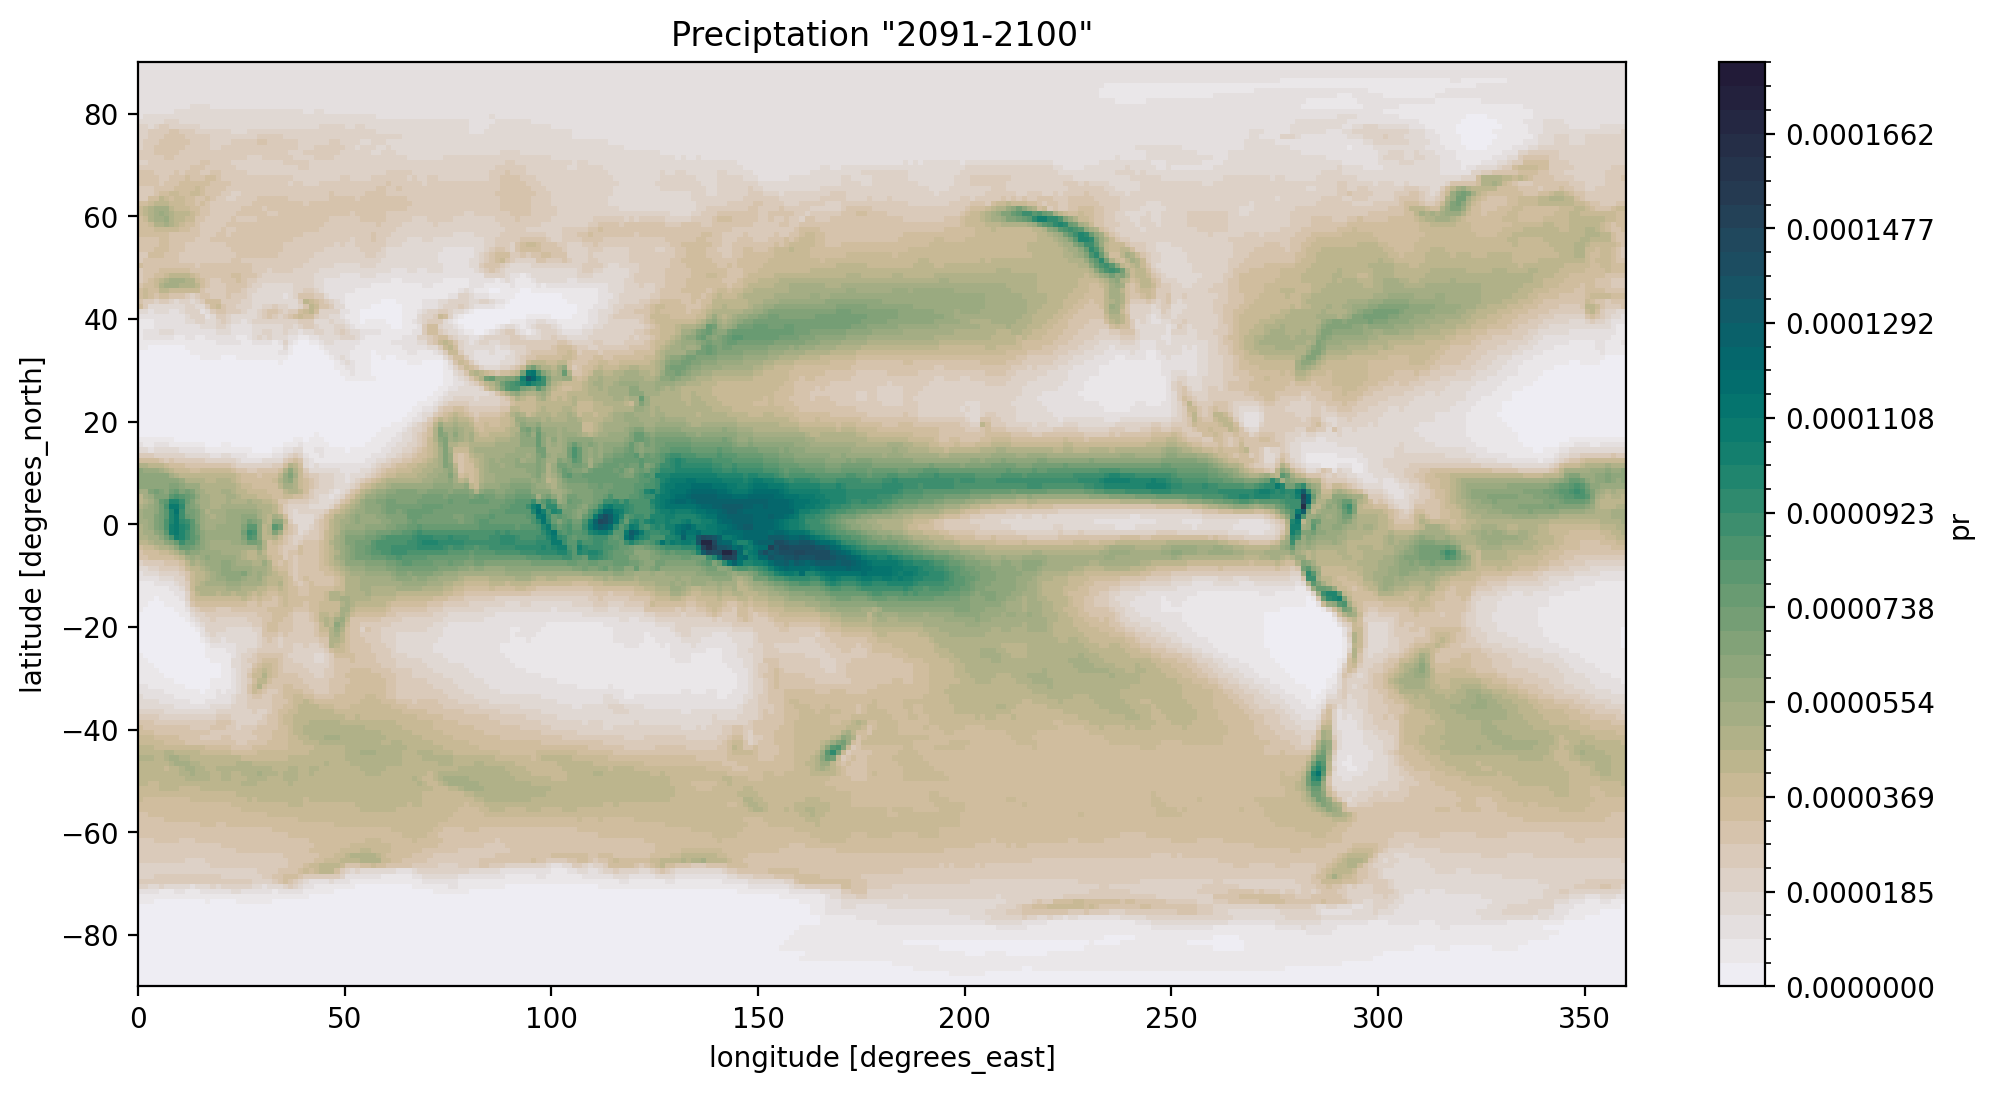

In [82]:
gfdl_esm4_pr5.sel(time=slice('2091-01-16','2100-12-16')).mean(dim='time').plot(vmin=0,
                                                                               vmax=0.00018,cmap=cmocean.cm.rain,
                                                                               levels=40)
plt.title('Preciptation "2091-2100"')

In [23]:
gfdl_esm4_prw1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prw1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15846,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [24]:
zstore_esm4_prw1 = gfdl_esm4_prw1_data.zstore.values[-1]
mapper_esm4_prw1 = gcs.get_mapper(zstore_esm4_prw1)
gfdl_esm4_prw1 = xr.open_zarr(mapper_esm4_prw1, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw1

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(682, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [25]:
gfdl_esm4_prw2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prw2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15388,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [26]:
zstore_esm4_prw2 = gfdl_esm4_prw2_data.zstore.values[-1]
mapper_esm4_prw2 = gcs.get_mapper(zstore_esm4_prw2)
gfdl_esm4_prw2 = xr.open_zarr(mapper_esm4_prw2, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw2

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(682, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [27]:
gfdl_esm4_prw5_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prw' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prw5_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18990,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,prw,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [28]:
zstore_esm4_prw5 = gfdl_esm4_prw5_data.zstore.values[-1]
mapper_esm4_prw5 = gcs.get_mapper(zstore_esm4_prw5)
gfdl_esm4_prw5 = xr.open_zarr(mapper_esm4_prw5, 
                                consolidated=True,use_cftime=True).prw.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prw5

<xarray.DataArray 'prw' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prw, shape=(1032, 180, 288), dtype=float32, chunksize=(683, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Water Vapor Path
    original_name:  prw
    standard_name:  atmosphere_mass_content_of_water_vapor
    units:          kg m-2

In [29]:
gfdl_esm4_evspsbl1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_evspsbl1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15941,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [30]:
zstore_esm4_evspsbl1 = gfdl_esm4_evspsbl1_data.zstore.values[-1]
mapper_esm4_evspsbl1 = gcs.get_mapper(zstore_esm4_evspsbl1)
gfdl_esm4_evspsbl1 = xr.open_zarr(mapper_esm4_evspsbl1, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl1

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(623, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [31]:
gfdl_esm4_evspsbl2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_evspsbl2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15359,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [32]:
zstore_esm4_evspsbl2 = gfdl_esm4_evspsbl2_data.zstore.values[-1]
mapper_esm4_evspsbl2 = gcs.get_mapper(zstore_esm4_evspsbl2)
gfdl_esm4_evspsbl2 = xr.open_zarr(mapper_esm4_evspsbl2, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl2

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(622, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [33]:
gfdl_esm4_evspsbl5_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'evspsbl' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_evspsbl5_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18977,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,evspsbl,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [34]:
zstore_esm4_evspsbl5 = gfdl_esm4_evspsbl5_data.zstore.values[-1]
mapper_esm4_evspsbl5 = gcs.get_mapper(zstore_esm4_evspsbl5)
gfdl_esm4_evspsbl5 = xr.open_zarr(mapper_esm4_evspsbl5, 
                                consolidated=True,use_cftime=True).evspsbl.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_evspsbl5

<xarray.DataArray 'evspsbl' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-evspsbl, shape=(1032, 180, 288), dtype=float32, chunksize=(622, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order2
    long_name:      Evaporation including Sublimation and Transpiration
    original_name:  evspsbl
    standard_name:  water_evapotranspiration_flux
    units:          kg m-2 s-1

In [35]:
gfdl_esm4_prsn1_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prsn1_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15845,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [36]:
zstore_esm4_prsn1 = gfdl_esm4_prsn1_data.zstore.values[-1]
mapper_esm4_prsn1 = gcs.get_mapper(zstore_esm4_prsn1)
gfdl_esm4_prsn1 = xr.open_zarr(mapper_esm4_prsn1, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn1

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

In [37]:
gfdl_esm4_prsn2_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp245' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prsn2_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15389,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp245,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [38]:
zstore_esm4_prsn2 = gfdl_esm4_prsn2_data.zstore.values[-1]
mapper_esm4_prsn2 = gcs.get_mapper(zstore_esm4_prsn2)
gfdl_esm4_prsn2 = xr.open_zarr(mapper_esm4_prsn2, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn2

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1

In [39]:
gfdl_esm4_prsn5_data = google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Amon' & \
    variable_id == 'prsn' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr1' & \
    member_id == 'r1i1p1f1'"
)
gfdl_esm4_prsn5_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
18989,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp585,r1i1p1f1,Amon,prsn,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [40]:
zstore_esm4_prsn5 = gfdl_esm4_prsn5_data.zstore.values[-1]
mapper_esm4_prsn5 = gcs.get_mapper(zstore_esm4_prsn5)
gfdl_esm4_prsn5 = xr.open_zarr(mapper_esm4_prsn5, 
                                consolidated=True,use_cftime=True).prsn.rename({'lat':'latitude',
                                                             'lon':'longitude'})
gfdl_esm4_prsn5

<xarray.DataArray 'prsn' (time: 1032, latitude: 180, longitude: 288)>
dask.array<open_dataset-prsn, shape=(1032, 180, 288), dtype=float32, chunksize=(1032, 180, 288), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float64 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    interp_method:  conserve_order1
    long_name:      Snowfall Flux
    original_name:  prsn
    standard_name:  snowfall_flux
    units:          kg m-2 s-1